## MULTIPLE LINEAR REGRESSION

#### Assignment Task:##### 
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributesice in EUROs


#### Dataset Description:
##### The dataset consists of the following variables:
##### Age: Age in years
##### KM: Accumulated Kilometers on odometer
##### FuelType: Fuel Type (Petrol, Diesel, CNG)
##### HP: Horse Power
##### Automatic: Automatic ( (Yes=1, No=0)
##### CC: Cylinder Volume in cubic centimeters
##### Doors: Number of doors
##### Weight: Weight in Kilograms
##### Quarterly_Tax: 
##### Price: Offer Price in EUROs

#### Taskes:
##### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
##### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
##### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
##### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
##### 5.Apply Lasso and Ridge methods on the model.

### TASK 1:
##### Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [88]:
import pandas as pd                                                 # importing pandas library for data manipulation
import numpy as np                                                  # importing numpy library for numerical calculations
import matplotlib.pyplot as plt                                     # importing matplot librabry for visualizations
import seaborn as sns                                               # importing seaborn library for visualizations
from sklearn.model_selection import train_test_split                # importing train_test_split from sklearn.model_selection library for splitting the data
from sklearn.linear_model import LinearRegression                   # importing LinearRegression from sklearn.linear_model library for model creation
import statsmodels.formula.api as smf                               # importing stats library for model cration
from statsmodels.graphics.regressionplots import influence_plot     # importing influence_plot from statsmodes.graphics library to find outliers
import warnings                                                     # importing warnings library to ignore warnings
warnings.filterwarnings("ignore")

In [89]:
toyota = pd.read_csv("ToyotaCorolla - MLR.csv")     # Loading the dataset
toyota                                              # displaying the loaded dataset

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [90]:
toyota.info()       # getting complete structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [91]:
# converting data types of some columns into categorical
toyota = toyota.astype({"Fuel_Type" : "category", "Automatic" : "category", "Doors" : "category", "Cylinders" : "category", "Gears" : "category"})
toyota.dtypes

Price           int64
Age_08_04       int64
KM              int64
Fuel_Type    category
HP              int64
Automatic    category
cc              int64
Doors        category
Cylinders    category
Gears        category
Weight          int64
dtype: object

In [92]:
# summary statistics
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,1615.00000


In [93]:
# checking the data types of a each column
toyota.dtypes

Price           int64
Age_08_04       int64
KM              int64
Fuel_Type    category
HP              int64
Automatic    category
cc              int64
Doors        category
Cylinders    category
Gears        category
Weight          int64
dtype: object

In [94]:
# dividing categorical and numerical columns from independent variables
cat_cols = ["Fuel_Type", "Automatic", "Doors", "Cylinders", "Gears"]
num_cols = ["Age_08_04", "KM", "HP", "cc", "Weight"]

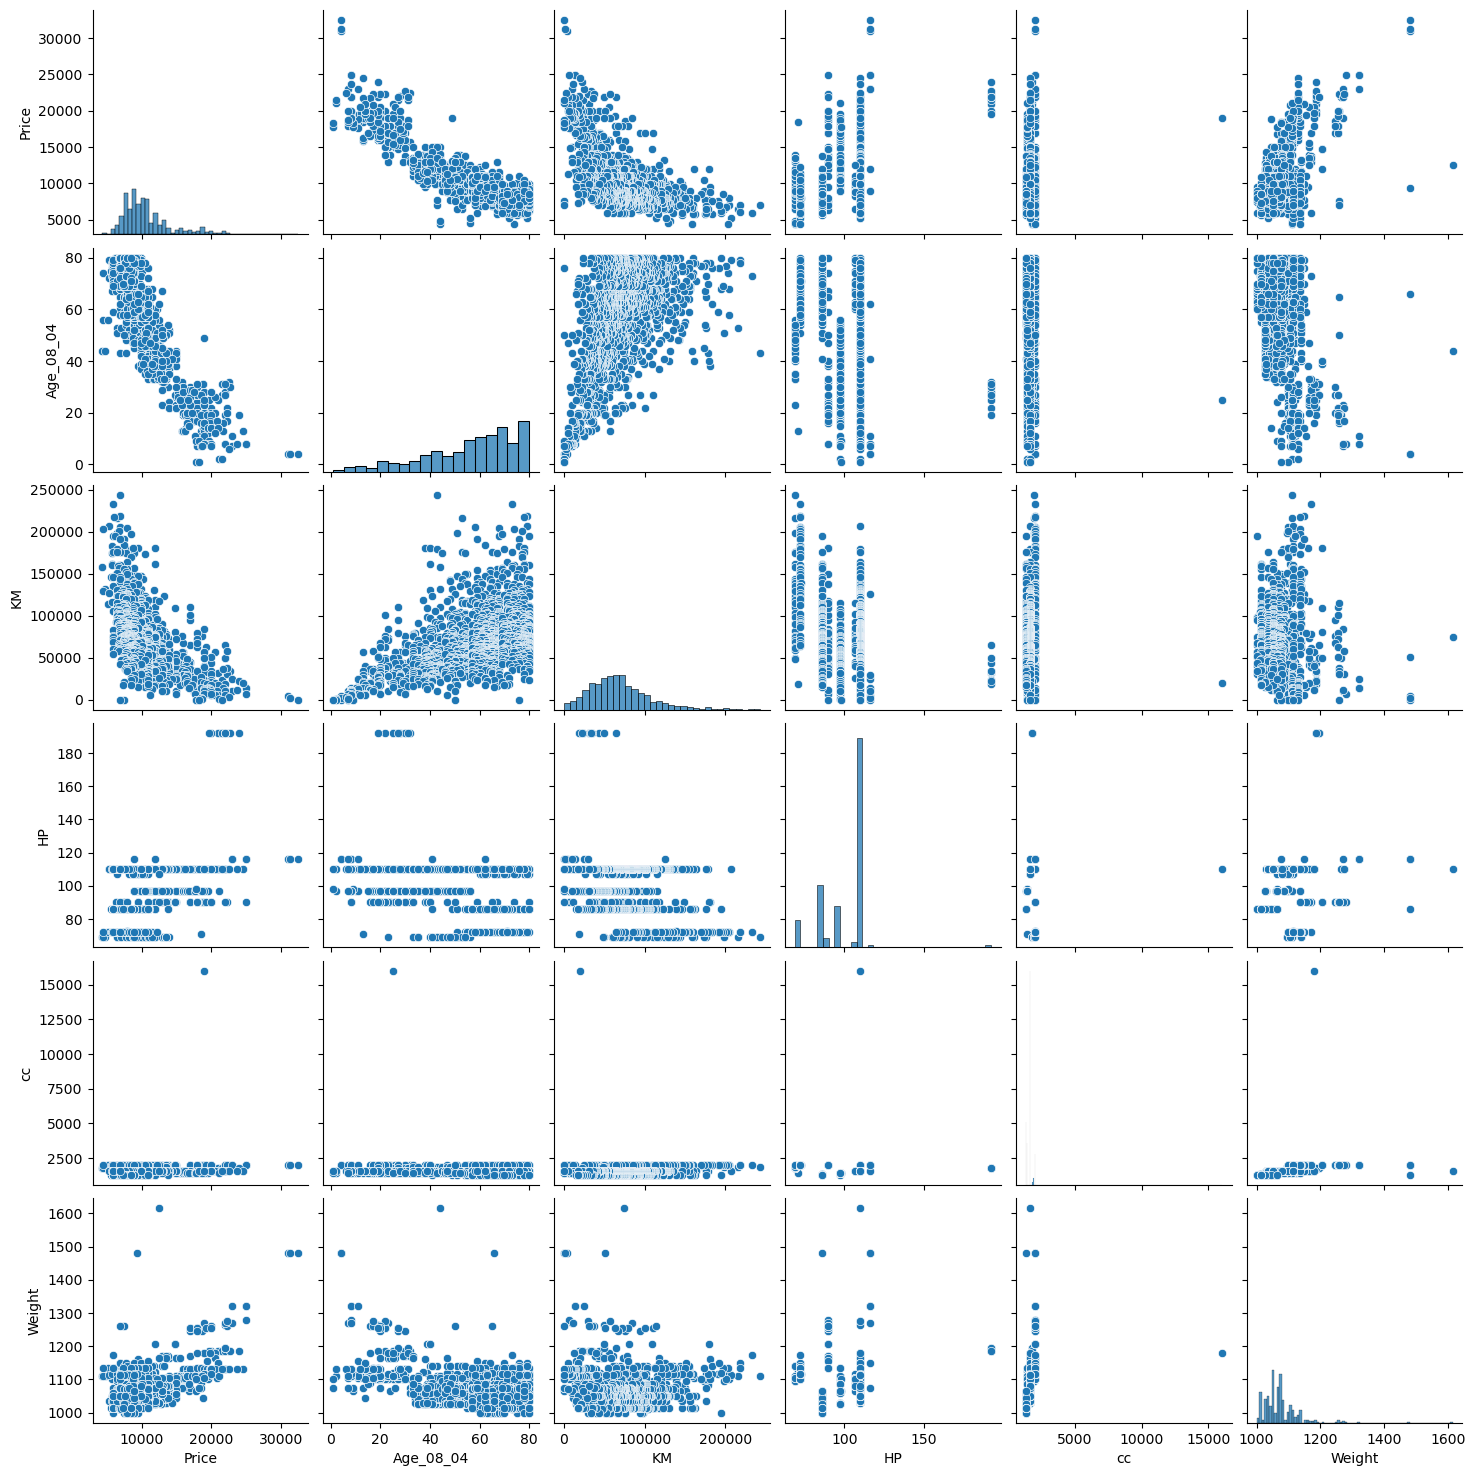

In [95]:
# Pairplot to visualize relationships between variables
sns.pairplot(toyota)

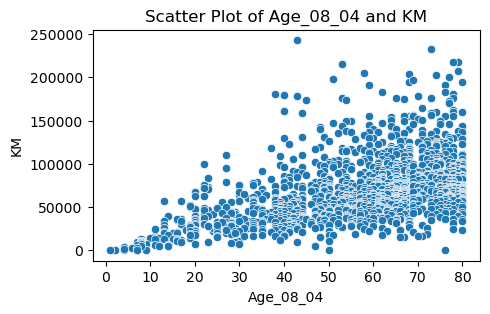

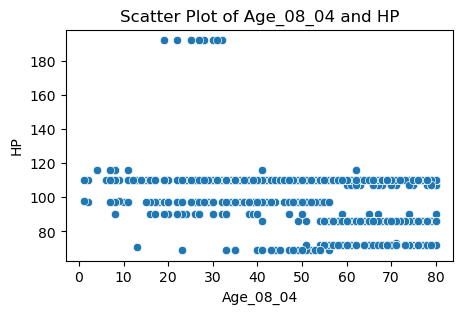

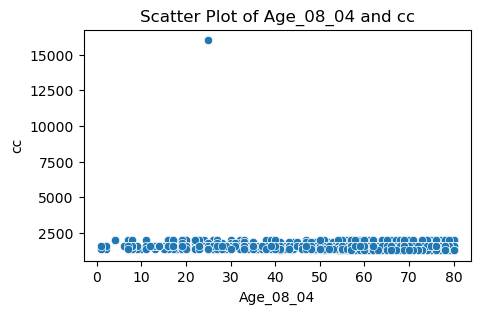

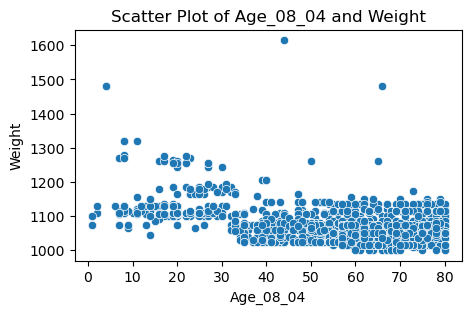

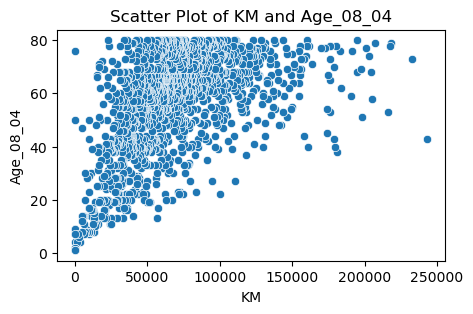

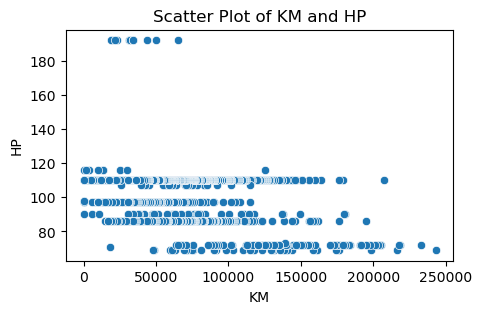

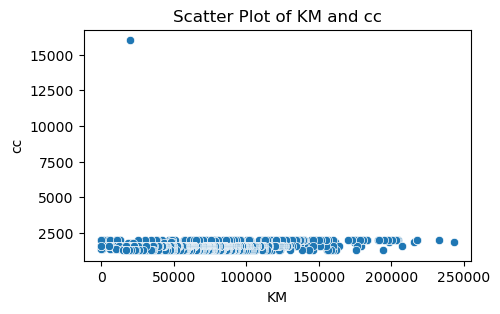

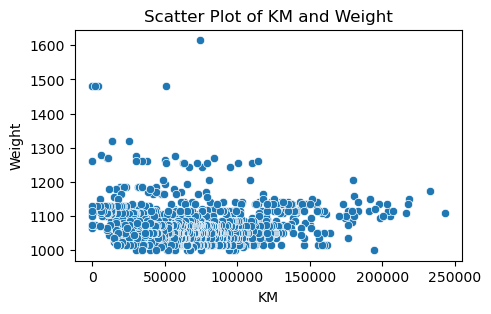

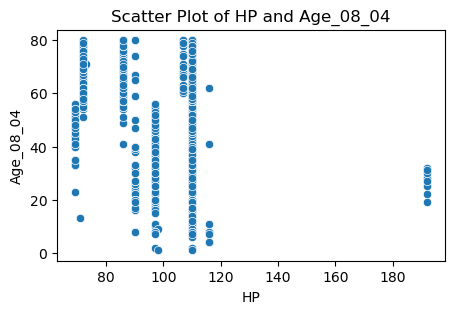

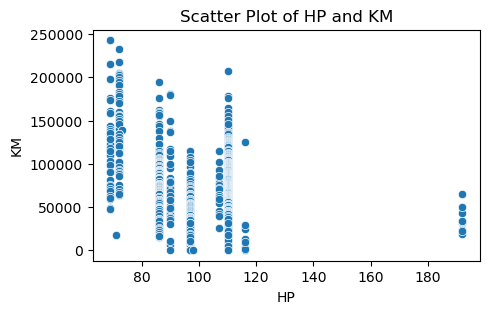

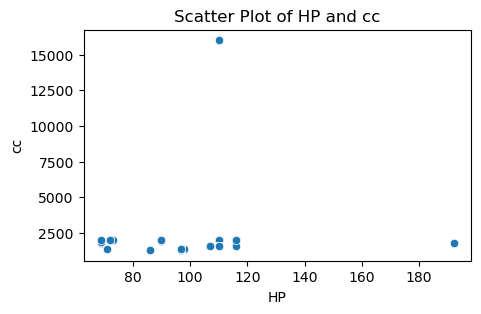

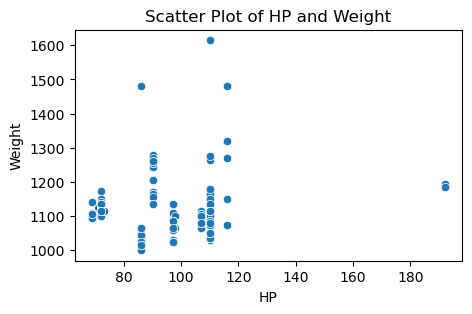

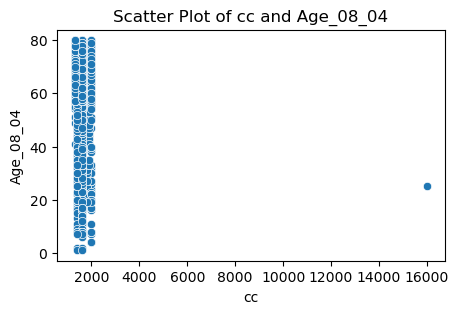

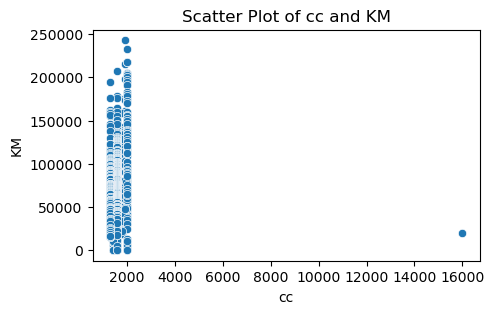

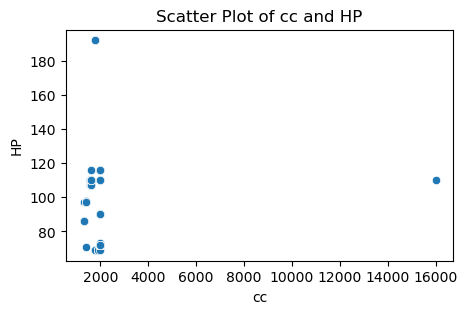

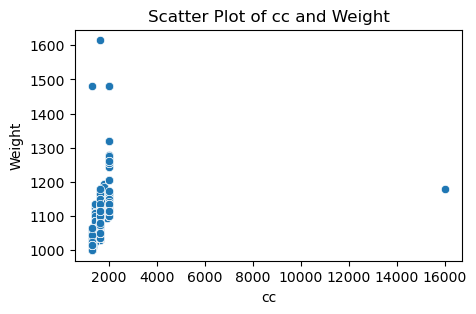

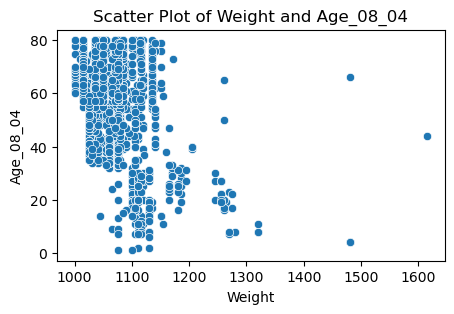

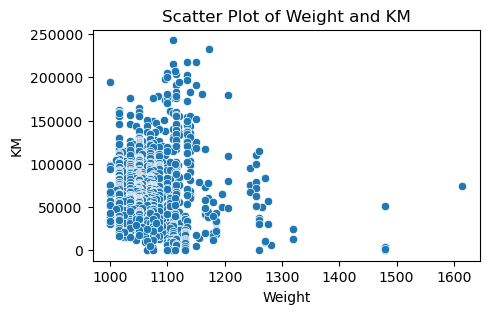

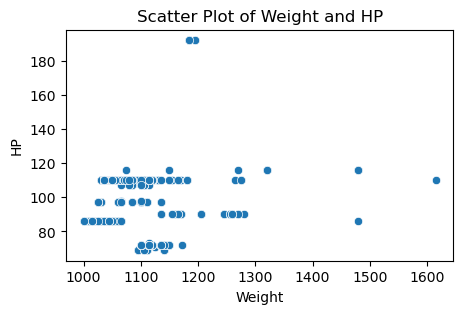

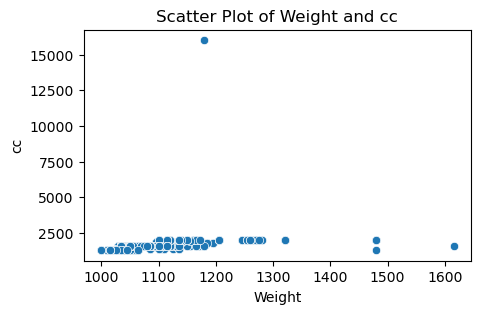

In [96]:
# Loop through each column in num_cols
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i != j:
            plt.figure(figsize=(5, 3))
            sns.scatterplot(x=toyota[num_cols[i]], y=toyota[num_cols[j]])
            plt.title(f'Scatter Plot of {num_cols[i]} and {num_cols[j]}')
            plt.xlabel(num_cols[i])
            plt.ylabel(num_cols[j])
            plt.show()

In [97]:
toyota[num_cols].corr()

,Age_08_04,KM,HP,cc,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.335637
Weight,-0.470253,-0.028598,0.089614,0.335637,1.000000


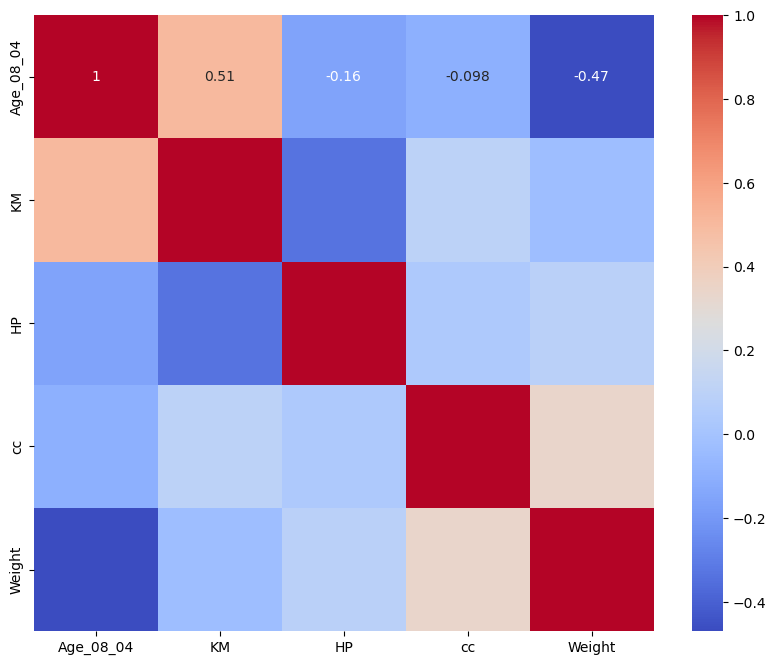

In [98]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(toyota[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

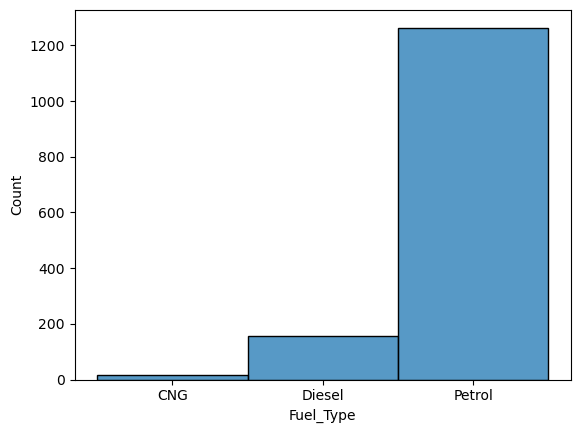

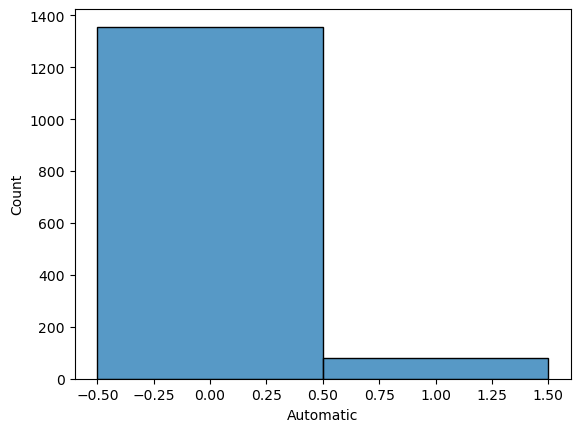

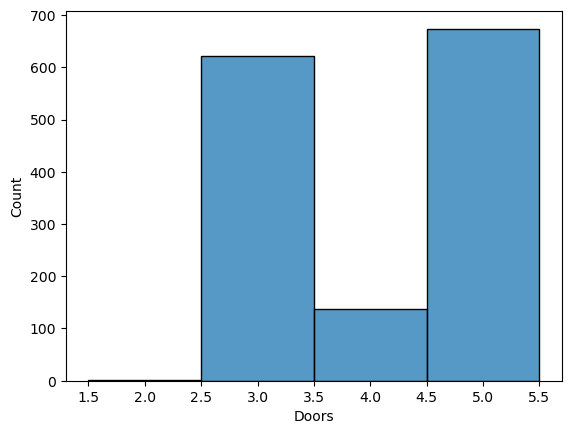

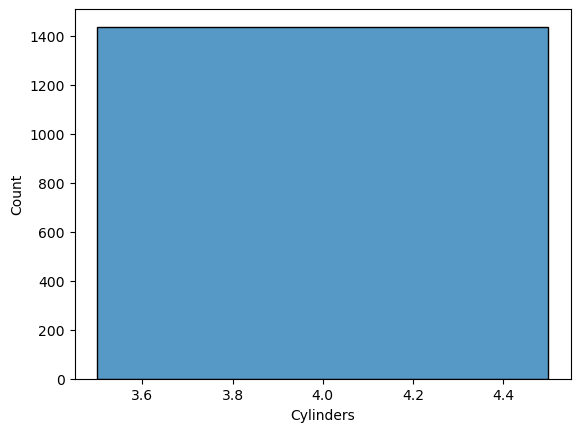

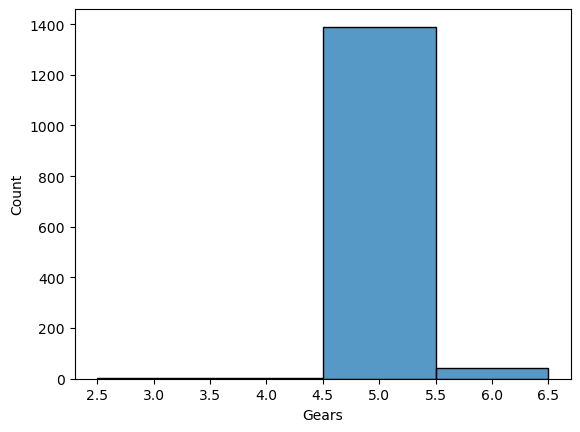

In [99]:
# histogram for each column
for i in toyota[cat_cols]:
    sns.histplot(toyota[i])
    plt.show()

In [100]:
toyota.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [101]:
# dividing X and y variables
X = toyota.drop(['Price'], axis=1)
y = toyota['Price']

In [102]:
# displaying X variables
X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [103]:
# displaying y variable
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

### Task 2:
##### Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

In [105]:
# printing the shape of train and test data
print("X_train Size = ", X_train.shape)
print("X_test Size = ", X_test.shape)
print("y_train Size = ", y_train.shape)
print("y_test Size = ", y_test.shape)

X_train Size =  (1148, 10)
X_test Size =  (288, 10)
y_train Size =  (1148,)
y_test Size =  (288,)


In [106]:
# importing standard caler from sklearn to standardize the data
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()                # defining standard scaler to scaler varibale
scaler = scaler.fit(X_train[num_cols])   # fitting the numerical columns of X_train data to scaler
X_train_std_data = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)     # transforming the data to get z values from standard scaler
X_train_std_data                         # displying the X_train data after standardized

,Age_08_04,KM,HP,cc,Weight
0,1.291366,0.812553,0.535551,0.035277,-0.446649
1,-1.368664,-1.245322,-0.302244,-0.394364,0.698698
2,0.280554,-0.079475,0.535551,0.035277,-0.160312
3,-2.113473,-1.535078,0.535551,0.035277,0.603253
4,-0.251452,3.395177,-2.106725,0.679738,0.412361
...,...,...,...,...,...
1143,0.493357,1.188183,-0.753364,0.894558,3.562066
1144,-0.304652,0.078126,0.535551,0.035277,-0.064866
1145,0.014551,-0.112639,0.535551,0.035277,0.030579
1146,0.972162,0.511655,0.535551,0.035277,-0.446649


In [108]:
X_train_std_data = X_train_std_data.reset_index()   # Reseting the index of standardized for concating the the x_train_std and X_train_dummies data
X_train_std_data                                    # Displying the data after restting the index

,index,Age_08_04,KM,HP,cc,Weight
0,0,1.291366,0.812553,0.535551,0.035277,-0.446649
1,1,-1.368664,-1.245322,-0.302244,-0.394364,0.698698
2,2,0.280554,-0.079475,0.535551,0.035277,-0.160312
3,3,-2.113473,-1.535078,0.535551,0.035277,0.603253
4,4,-0.251452,3.395177,-2.106725,0.679738,0.412361
...,...,...,...,...,...,...
1143,1143,0.493357,1.188183,-0.753364,0.894558,3.562066
1144,1144,-0.304652,0.078126,0.535551,0.035277,-0.064866
1145,1145,0.014551,-0.112639,0.535551,0.035277,0.030579
1146,1146,0.972162,0.511655,0.535551,0.035277,-0.446649


In [109]:
X_train_std_data = X_train_std_data.drop(["index"], axis = 1)   # dropping the index column 
X_train_std_data                                                # displying the data after dropping

,Age_08_04,KM,HP,cc,Weight
0,1.291366,0.812553,0.535551,0.035277,-0.446649
1,-1.368664,-1.245322,-0.302244,-0.394364,0.698698
2,0.280554,-0.079475,0.535551,0.035277,-0.160312
3,-2.113473,-1.535078,0.535551,0.035277,0.603253
4,-0.251452,3.395177,-2.106725,0.679738,0.412361
...,...,...,...,...,...
1143,0.493357,1.188183,-0.753364,0.894558,3.562066
1144,-0.304652,0.078126,0.535551,0.035277,-0.064866
1145,0.014551,-0.112639,0.535551,0.035277,0.030579
1146,0.972162,0.511655,0.535551,0.035277,-0.446649


In [110]:
X_test_std_data = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = X_test[num_cols].columns)   # transforming the data to get z values from standard scaler
X_test_std_data                                       # displaying the data after standardizing

,Age_08_04,KM,HP,cc,Weight
0,-0.038649,-0.865847,0.535551,0.035277,-0.732985
1,0.174153,-1.226751,0.535551,0.035277,0.030579
2,1.291366,0.605299,0.342214,0.035277,0.603253
3,0.652959,-0.698736,0.535551,0.035277,-0.446649
4,-0.357853,-0.876541,0.535551,0.035277,0.126025
...,...,...,...,...,...
283,-1.741069,-1.561420,-0.302244,-0.394364,0.507807
284,1.025363,-0.201515,-1.011147,-0.609184,-0.732985
285,-0.304652,-0.100232,-0.302244,-0.394364,-0.255758
286,-0.730257,-1.044073,0.535551,0.035277,-0.351203


In [111]:
X_test_std_data = X_test_std_data.reset_index()    # Reseting the index of standardized for concating the the x_test_std and X_test_dummies data
X_test_std_data                                    # Displying the data after restting the index

,index,Age_08_04,KM,HP,cc,Weight
0,0,-0.038649,-0.865847,0.535551,0.035277,-0.732985
1,1,0.174153,-1.226751,0.535551,0.035277,0.030579
2,2,1.291366,0.605299,0.342214,0.035277,0.603253
3,3,0.652959,-0.698736,0.535551,0.035277,-0.446649
4,4,-0.357853,-0.876541,0.535551,0.035277,0.126025
...,...,...,...,...,...,...
283,283,-1.741069,-1.561420,-0.302244,-0.394364,0.507807
284,284,1.025363,-0.201515,-1.011147,-0.609184,-0.732985
285,285,-0.304652,-0.100232,-0.302244,-0.394364,-0.255758
286,286,-0.730257,-1.044073,0.535551,0.035277,-0.351203


In [112]:
X_test_std_data = X_test_std_data.drop(["index"], axis = 1)    # dropping the index column
X_test_std_data                                                # displying the data after dropping

,Age_08_04,KM,HP,cc,Weight
0,-0.038649,-0.865847,0.535551,0.035277,-0.732985
1,0.174153,-1.226751,0.535551,0.035277,0.030579
2,1.291366,0.605299,0.342214,0.035277,0.603253
3,0.652959,-0.698736,0.535551,0.035277,-0.446649
4,-0.357853,-0.876541,0.535551,0.035277,0.126025
...,...,...,...,...,...
283,-1.741069,-1.561420,-0.302244,-0.394364,0.507807
284,1.025363,-0.201515,-1.011147,-0.609184,-0.732985
285,-0.304652,-0.100232,-0.302244,-0.394364,-0.255758
286,-0.730257,-1.044073,0.535551,0.035277,-0.351203


In [113]:
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first = True).astype(int)  # creating dummies of categorical columns
X_train_dummies                                                                     # displaying the data after creating dummies

,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
1154,0,1,0,1,0,0,0,1,0
79,0,1,0,0,0,1,0,1,0
842,0,1,0,1,0,0,0,0,1
160,0,1,0,0,1,0,0,1,0
379,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
654,1,0,0,1,0,0,0,1,0
454,0,1,1,1,0,0,0,1,0
473,0,1,0,0,0,1,0,1,0
1200,0,1,0,1,0,0,0,1,0


In [114]:
X_train_dummies = X_train_dummies.reset_index()    # resting the index to concat the X_train_std and X_train_dummies data
X_train_dummies                                    # displaying the data after resting index

,index,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,1154,0,1,0,1,0,0,0,1,0
1,79,0,1,0,0,0,1,0,1,0
2,842,0,1,0,1,0,0,0,0,1
3,160,0,1,0,0,1,0,0,1,0
4,379,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1143,654,1,0,0,1,0,0,0,1,0
1144,454,0,1,1,1,0,0,0,1,0
1145,473,0,1,0,0,0,1,0,1,0
1146,1200,0,1,0,1,0,0,0,1,0


In [115]:
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)    # dropping the index column
X_train_dummies                                                # displaying the data after dropping the index column

,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1143,1,0,0,1,0,0,0,1,0
1144,0,1,1,1,0,0,0,1,0
1145,0,1,0,0,0,1,0,1,0
1146,0,1,0,1,0,0,0,1,0


In [116]:
X_test_dummies = pd.get_dummies(X_test[cat_cols], drop_first = True).astype(int)     # creating the dummies of categorical columns
X_test_dummies                                                                       #  displaying the data after creating dummies

,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
566,0,1,0,0,1,0,0,1,0
1039,0,1,0,0,0,1,0,1,0
1182,0,1,1,0,0,1,0,1,0
995,0,1,0,1,0,0,0,1,0
569,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
37,0,1,0,1,0,0,0,1,0
1346,0,1,0,0,0,1,0,1,0
470,0,1,0,0,0,1,0,1,0
342,0,1,0,1,0,0,0,1,0


In [117]:
X_test_dummies = X_test_dummies.reset_index()   # reseting the index column to concat X_train_dummies and X_train_std data
X_test_dummies                                  # displaying the data after resting index

,index,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,566,0,1,0,0,1,0,0,1,0
1,1039,0,1,0,0,0,1,0,1,0
2,1182,0,1,1,0,0,1,0,1,0
3,995,0,1,0,1,0,0,0,1,0
4,569,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
283,37,0,1,0,1,0,0,0,1,0
284,1346,0,1,0,0,0,1,0,1,0
285,470,0,1,0,0,0,1,0,1,0
286,342,0,1,0,1,0,0,0,1,0


In [118]:
X_test_dummies = X_test_dummies.drop(["index"], axis = 1)    # droping the index column
X_test_dummies                                               # displaying the data after dropping

,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,1,0
2,0,1,1,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
283,0,1,0,1,0,0,0,1,0
284,0,1,0,0,0,1,0,1,0
285,0,1,0,0,0,1,0,1,0
286,0,1,0,1,0,0,0,1,0


In [119]:
final_X_train_data = pd.concat([X_train_std_data, X_train_dummies], axis = 1)  # concating the X_train_std and X_train_dummies data and defining it as finalX_train_data
final_X_train_data                                # displaying the data after concating

,Age_08_04,KM,HP,cc,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,1.291366,0.812553,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0
1,-1.368664,-1.245322,-0.302244,-0.394364,0.698698,0,1,0,0,0,1,0,1,0
2,0.280554,-0.079475,0.535551,0.035277,-0.160312,0,1,0,1,0,0,0,0,1
3,-2.113473,-1.535078,0.535551,0.035277,0.603253,0,1,0,0,1,0,0,1,0
4,-0.251452,3.395177,-2.106725,0.679738,0.412361,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,0.493357,1.188183,-0.753364,0.894558,3.562066,1,0,0,1,0,0,0,1,0
1144,-0.304652,0.078126,0.535551,0.035277,-0.064866,0,1,1,1,0,0,0,1,0
1145,0.014551,-0.112639,0.535551,0.035277,0.030579,0,1,0,0,0,1,0,1,0
1146,0.972162,0.511655,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0


In [120]:
final_X_test_data = pd.concat([X_test_std_data, X_test_dummies], axis = 1)   # concating the X_test_std and X_test_dummies data and defining it as final_X_test_data
final_X_test_data                    # displaying final_X_test_data

,Age_08_04,KM,HP,cc,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,-0.038649,-0.865847,0.535551,0.035277,-0.732985,0,1,0,0,1,0,0,1,0
1,0.174153,-1.226751,0.535551,0.035277,0.030579,0,1,0,0,0,1,0,1,0
2,1.291366,0.605299,0.342214,0.035277,0.603253,0,1,1,0,0,1,0,1,0
3,0.652959,-0.698736,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0
4,-0.357853,-0.876541,0.535551,0.035277,0.126025,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-1.741069,-1.561420,-0.302244,-0.394364,0.507807,0,1,0,1,0,0,0,1,0
284,1.025363,-0.201515,-1.011147,-0.609184,-0.732985,0,1,0,0,0,1,0,1,0
285,-0.304652,-0.100232,-0.302244,-0.394364,-0.255758,0,1,0,0,0,1,0,1,0
286,-0.730257,-1.044073,0.535551,0.035277,-0.351203,0,1,0,1,0,0,0,1,0


In [121]:
y_train = y_train.reset_index()     # reseting the index of y_train data
y_train                             # displaying the data after resting

,index,Price
0,1154,6490
1,79,14900
2,842,10500
3,160,18950
4,379,6400
...,...,...
1143,654,6950
1144,454,11950
1145,473,11950
1146,1200,8950


In [122]:
y_train = y_train.drop(["index"], axis = 1)      # dropping the index column
y_train                                          # displaying the data after dropping

,Price
0,6490
1,14900
2,10500
3,18950
4,6400
...,...
1143,6950
1144,11950
1145,11950
1146,8950


In [123]:
y_test = y_test.reset_index()   # resting the index of y_test data
y_test                          # displaying the data after resting

,index,Price
0,566,10995
1,1039,10950
2,1182,9900
3,995,9950
4,569,13000
...,...,...
283,37,14950
284,1346,7950
285,470,10900
286,342,14950


In [124]:
y_test = y_test.drop(["index"], axis = 1)   # dropping the index column
y_test                                      # displaying the data after dropping

,Price
0,10995
1,10950
2,9900
3,9950
4,13000
...,...
283,14950
284,7950
285,10900
286,14950


In [125]:
final_X_train_data_1 = pd.concat([final_X_train_data, y_train], axis = 1) # combing the final_X_train_data and y_train data and defining it as final_train_data
final_X_train_data_1         # displaying the final_train_data

,Age_08_04,KM,HP,cc,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6,Price
0,1.291366,0.812553,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0,6490
1,-1.368664,-1.245322,-0.302244,-0.394364,0.698698,0,1,0,0,0,1,0,1,0,14900
2,0.280554,-0.079475,0.535551,0.035277,-0.160312,0,1,0,1,0,0,0,0,1,10500
3,-2.113473,-1.535078,0.535551,0.035277,0.603253,0,1,0,0,1,0,0,1,0,18950
4,-0.251452,3.395177,-2.106725,0.679738,0.412361,1,0,0,0,1,0,0,1,0,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,0.493357,1.188183,-0.753364,0.894558,3.562066,1,0,0,1,0,0,0,1,0,6950
1144,-0.304652,0.078126,0.535551,0.035277,-0.064866,0,1,1,1,0,0,0,1,0,11950
1145,0.014551,-0.112639,0.535551,0.035277,0.030579,0,1,0,0,0,1,0,1,0,11950
1146,0.972162,0.511655,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0,8950


In [126]:
final_X_test_data_1 = pd.concat([final_X_test_data, y_test], axis = 1)   # combing the final_X_test_data and y_test data and defining it as final_test_data
final_X_test_data_1              # displaying the final_train_data

,Age_08_04,KM,HP,cc,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6,Price
0,-0.038649,-0.865847,0.535551,0.035277,-0.732985,0,1,0,0,1,0,0,1,0,10995
1,0.174153,-1.226751,0.535551,0.035277,0.030579,0,1,0,0,0,1,0,1,0,10950
2,1.291366,0.605299,0.342214,0.035277,0.603253,0,1,1,0,0,1,0,1,0,9900
3,0.652959,-0.698736,0.535551,0.035277,-0.446649,0,1,0,1,0,0,0,1,0,9950
4,-0.357853,-0.876541,0.535551,0.035277,0.126025,0,1,0,0,0,1,0,1,0,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-1.741069,-1.561420,-0.302244,-0.394364,0.507807,0,1,0,1,0,0,0,1,0,14950
284,1.025363,-0.201515,-1.011147,-0.609184,-0.732985,0,1,0,0,0,1,0,1,0,7950
285,-0.304652,-0.100232,-0.302244,-0.394364,-0.255758,0,1,0,0,0,1,0,1,0,10900
286,-0.730257,-1.044073,0.535551,0.035277,-0.351203,0,1,0,1,0,0,0,1,0,14950


### Task 3:
##### Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [128]:
# Building the model using statisticmodels.functions.api and defining it as model_1
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Automatic_1+Doors_3+Doors_4+Doors_5+Gears_4+Gears_5+Gears_6', data = final_X_train_data_1).fit()

In [129]:
model_1.summary()   # displaying the model_1 summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     629.5
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:55:00   Log-Likelihood:                -9859.6
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1134   BIC:                         1.982e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9372.0852   1654.137      5.666      0.000    6126.571    1.26e+04
Age_08_04        -2284.5500     54.384    -42.008      0.000   -2391.254   -2177.846
KM                -623.3691     54.961    -11.342      0.000    -731.205    -515.533
HP                 241.4534     61.278      3.940      0.000     121.223     361.684
cc                 -30.8992     42.051     -0.735      0.463    -113.405      51.607
Weight            1433.8504     78.816     18.192      0.000    1279.210    1588.491
Fuel_Type_Diesel  -280.3703    427.292     -0.656      0.512   -1118.742     558.001
Fuel_Type_Petrol  1199.3312    378.299      3.170      0.002     457.087    1941.575
Automatic_1        107.9850    182.128      0.593      0.553    -249.361     465.331
Doors_3           -596.9829    928.343     -0.643      0.520   -2418.446    1224.480
Doors_4           -216.1417    935.287     -0.231      0.817   -2051.230    1618.947
Doors_5           -739.4627    929.554     -0.796      0.426   -2563.302    1084.377
Gears_4           2.573e-12    2.4e-12      1.071      0.284   -2.14e-12    7.29e-12
Gears_5           1001.3983   1319.465      0.759      0.448   -1587.469    3590.265
Gears_6           1572.0380   1342.126      1.171      0.242   -1061.292    4205.368
==============================================================================
Omnibus:                      263.764   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3129.080
Skew:                          -0.703   Prob(JB):                         0.00
Kurtosis:                      10.965   Cond. No.                     1.50e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
y_train_preds_1 = model_1.predict(final_X_train_data_1)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_1        # displaying the predictions

0        7006.914471
1       15677.465876
2       10853.430189
3       18135.122352
4        8396.561931
            ...     
1143    12526.281409
1144    11766.320294
1145    11042.390601
1146     7923.722071
1147    16053.538833
Length: 1148, dtype: float64

In [131]:
rmse = np.sqrt(np.mean((np.array(final_X_train_data_1["Price"])-np.array(y_train_preds_1))**2))
rmse 

1299.3069196756944

#### Dropping the columns which column has p_value > 0.05

In [132]:
# dropping the columns whose columns has p_value > 0.05 and defining it as final_train_data
final_X_train_data_2 = final_X_train_data_1.drop(["cc", "Fuel_Type_Diesel", "Automatic_1", "Doors_3", "Doors_4", "Doors_5", "Gears_4", "Gears_5", "Gears_6"], axis = 1)
# displaying the data after dropping
final_X_train_data_2

,Age_08_04,KM,HP,Weight,Fuel_Type_Petrol,Price
0,1.291366,0.812553,0.535551,-0.446649,1,6490
1,-1.368664,-1.245322,-0.302244,0.698698,1,14900
2,0.280554,-0.079475,0.535551,-0.160312,1,10500
3,-2.113473,-1.535078,0.535551,0.603253,1,18950
4,-0.251452,3.395177,-2.106725,0.412361,0,6400
...,...,...,...,...,...,...
1143,0.493357,1.188183,-0.753364,3.562066,0,6950
1144,-0.304652,0.078126,0.535551,-0.064866,1,11950
1145,0.014551,-0.112639,0.535551,0.030579,1,11950
1146,0.972162,0.511655,0.535551,-0.446649,1,8950


In [133]:
# building the model with less columns which has p_value < 0.05 and defining it as model_2
model_2 = smf.ols("Price~Age_08_04+KM+HP+Weight+Fuel_Type_Petrol", data = final_X_train_data_2).fit()
# displaying the model_2
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1613.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:55:01   Log-Likelihood:                -9870.4
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1142   BIC:                         1.978e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9721.6608    196.880     49.379      0.000    9335.374    1.01e+04
Age_08_04        -2288.1202     54.154    -42.252      0.000   -2394.373   -2181.868
KM                -630.8605     54.894    -11.492      0.000    -738.564    -523.157
HP                 310.7655     52.349      5.936      0.000     208.055     413.476
Weight            1330.9616     65.130     20.436      0.000    1203.175    1458.749
Fuel_Type_Petrol  1216.9446    220.481      5.519      0.000     784.351    1649.538
==============================================================================
Omnibus:                      203.553   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.065
Skew:                          -0.527   Prob(JB):                         0.00
Kurtosis:                       9.153   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
y_train_preds_2 = model_2.predict(final_X_train_data_2)   # predicting the predictions for train data and defining it as y_train-preds_2
y_train_preds_2         # displaying the predictions

0        7043.155808
1       15691.912025
2       10299.862315
3       17712.242426
4        8049.268956
            ...     
1143    12350.076412
1144    11666.495566
1145    11183.499806
1146     7963.357188
1147    16096.988707
Length: 1148, dtype: float64

In [135]:
rmse = np.sqrt(np.mean((np.array(final_X_train_data_2["Price"])-np.array(y_train_preds_2))**2))   # calculating the root mean square error and defining it as rmse
rmse      # displaying rmse 

1311.5034379730932

#### the model has good R-Square and Adjusted R-Square but AIC and BIC and RMSE was not good so I want to do transformation

In [136]:
# building the model with log transformation on y_variable and defining it as model_3
model_3 = smf.ols("np.log(Price)~Age_08_04+KM+HP+Weight", data = final_X_train_data_2).fit()
# displaying the model_3 summary
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1666.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:55:02   Log-Likelihood:                 849.31
No. Observations:                1148   AIC:                            -1689.
Df Residuals:                    1143   BIC:                            -1663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2370      0.003   2704.522      0.000       9.230       9.244
Age_08_04     -0.1948      0.005    -40.909      0.000      -0.204      -0.185
KM            -0.0713      0.004    -16.287      0.000      -0.080      -0.063
HP             0.0362      0.004      9.915      0.000       0.029       0.043
Weight         0.0581      0.004     14.160      0.000       0.050       0.066
==============================================================================
Omnibus:                      247.273   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.187
Skew:                          -0.911   Prob(JB):                    4.91e-265
Kurtosis:                       7.704   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# predicting the predictions for final_train_data using predict function
y_train_preds_3 = model_3.predict(final_X_train_data_2)
# displaying the predictions
y_train_preds_3

0       8.921018
1       9.622000
2       9.198110
3       9.812522
4       8.991751
          ...   
1143    9.235911
1144    9.306419
1145    9.263378
1146    9.004636
1147    9.636858
Length: 1148, dtype: float64

#### I had predicted but the prediction are in log values because i had done log transformation on y variable
#### So I have to get exact value of predictions

In [138]:
# predicting exact values by using exponential function
y_train_preds_3 = np.exp(y_train_preds_3)
# displaying the exact predictions
y_train_preds_3

0        7487.704170
1       15093.199691
2        9878.436507
3       18260.987841
4        8036.518864
            ...     
1143    10259.004496
1144    11008.457094
1145    10544.691086
1146     8140.733925
1147    15319.127967
Length: 1148, dtype: float64

In [139]:
rmse = np.sqrt(np.mean((np.array(final_X_train_data_2["Price"])-np.array(y_train_preds_3))**2))   # calculating the root mean square error and defining it as rmse
rmse       # displaying rmse

1173.211593130277

#### RMSE was not good so I want to find VIF values if we can drop and column and we can increase model RMSE?

In [141]:
# calculating R-Square for each independent variable
# claculating the VIF value for each independent variable
rsq_age = smf.ols('Age_08_04~KM+HP+Weight+Fuel_Type_Petrol', data = final_X_train_data_2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols("KM~Age_08_04+HP+Weight+Fuel_Type_Petrol", data = final_X_train_data_2).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_HP = smf.ols("HP~Age_08_04+KM+Weight+Fuel_Type_Petrol", data = final_X_train_data_2).fit().rsquared
vif_HP = 1/(1-rsq_km)

rsq_Weight = smf.ols("Weight~Age_08_04+HP+KM+Fuel_Type_Petrol", data = final_X_train_data_2).fit().rsquared
vif_Weight = 1/(1-rsq_km)

rsq_Fuel_Type_Petrol = smf.ols("Fuel_Type_Petrol~Age_08_04+HP+Weight+KM", data = final_X_train_data_2).fit().rsquared
vif_Fuel_Type_Petrol = 1/(1-rsq_km)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Weight', 'Fuel_Type_Petrol'],'VIF':[vif_age,vif_km,vif_HP,vif_Weight,vif_Fuel_Type_Petrol]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.947095
1,KM,2.000642
2,HP,2.000642
3,Weight,2.000642
4,Fuel_Type_Petrol,2.000642


#### VIFvalues are less so we cannot drop so I though of detecting outliers to drop and to increase model performance

In [164]:
# Function to detect outliers using IQR method and return outlier rows
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_indices = data[outliers.any(axis=1)].index
    return outlier_indices

# Applying the function to the dataset
outlier_indices_iqr = detect_outliers_iqr(final_X_train_data_2)

# Displaying the outlier indices
print("Outlier indices (IQR):", outlier_indices_iqr)

# Removing outliers
final_X_train_data_3 = final_X_train_data_2.drop(index=outlier_indices_iqr)

# Fit the model after removing outliers
model_4 = smf.ols("Price ~ Age_08_04 + KM + HP + Weight + Fuel_Type_Petrol", data=final_X_train_data_3).fit()
print("Model summary after removing outliers (IQR):")
print(model_4.summary())


Outlier indices (IQR): Index([   3,    4,    6,   15,   17,   20,   22,   30,   33,   35,
       ...
       1093, 1105, 1106, 1108, 1126, 1127, 1128, 1140, 1143, 1147],
      dtype='int64', length=232)
Model summary after removing outliers (IQR):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:11:30   Log-Likelihood:                -7578.5
No. Observations:                 916   AIC:                         1.517e+04
Df Residuals:                     911   BIC:                         1.519e+04
Df Model:                           4                                         
Covariance Type:            nonrobust     

In [165]:
# predicting the predictions for final_train_data using predict fuction and defining it as y_train_preds_4
y_train_preds_4 = model_4.predict(final_X_train_data_3)
# displaying the predictions
y_train_preds_4

0        7192.113645
1       14971.014953
2        9979.097793
5       10954.868288
7       10015.981961
            ...     
1141    11351.840975
1142     8870.585444
1144    11191.647806
1145    10749.926238
1146     7977.167300
Length: 916, dtype: float64

In [166]:
# calculating the root mean square error and defining it as rmse
rmse = np.sqrt(np.mean((np.array(final_X_train_data_3["Price"])-np.array(y_train_preds_4))**2))
# displaying the rmse
rmse 

948.1991169110466

#### the model was some what better after deleting the outliers
#### but I tried for more

In [168]:
# build the other model by log transformation on data after deleting the outliers and defined it as model_5
model_5 = smf.ols('np.log(Price)~Age_08_04+KM+HP+Weight', data = final_X_train_data_3).fit()
# displaying the model_5 summary
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     860.7
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          1.32e-307
Time:                        11:11:32   Log-Likelihood:                 819.06
No. Observations:                 916   AIC:                            -1628.
Df Residuals:                     911   BIC:                            -1604.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2501      0.005   1987.590      0.000       9.241       9.259
Age_08_04     -0.1882      0.005    -37.575      0.000      -0.198      -0.178
KM            -0.0516      0.005     -9.598      0.000      -0.062      -0.041
HP             0.0016      0.006      0.244      0.807      -0.011       0.014
Weight         0.0890      0.009     10.309      0.000       0.072       0.106
==============================================================================
Omnibus:                       41.869   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.441
Skew:                          -0.419   Prob(JB):                     3.36e-13
Kurtosis:                       3.895   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# predicting the predictions for final_train_data using predict function
y_train_preds_5 = model_5.predict(final_X_train_data_3)
# displaying the predictions
y_train_preds_5

0       8.926253
1       9.633710
2       9.188014
5       9.288372
7       9.188789
          ...   
1141    9.312172
1142    9.090857
1144    9.298536
1145    9.256781
1146    9.001860
Length: 916, dtype: float64

In [170]:
# calculating the root mean square error and defining it as rmse
rmse = np.sqrt(np.mean((np.array(final_X_train_data_3["Price"])-np.array(y_train_preds_5))**2))
# displaying the rmse
rmse 

10259.156255468954

#### model_5 has bad performance comapred to model_4 so I decided to go with model_4

### Task 4:
##### Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

#### Model_1 EValuation

In [2]:
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling

# Generating a Q-Q plot to check if the residuals of the model follow a normal distribution
qqplot = sm.qqplot(model_1.resid, line='q')  # 'line' parameter is set to 'q' to draw the 45-degree diagonal line

# Setting the title of the plot
plt.title("Normal Q-Q plot of residuals")

# Displaying the plot
plt.show()

NameError: name 'model_1' is not defined

In [3]:
def get_standardized_values(vals):
    # Calculate the mean of the input values
    mean = vals.mean()
    
    # Calculate the standard deviation of the input values
    std_dev = vals.std()
    
    # Standardize the values by subtracting the mean and dividing by the standard deviation
    standardized_vals = (vals - mean) / std_dev
    
    return standardized_vals  # Return the standardized values

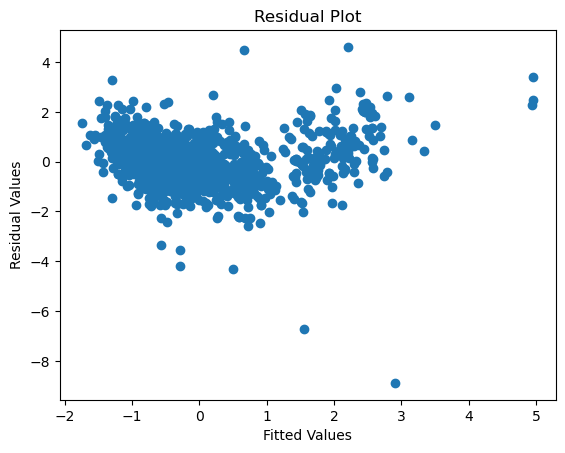

In [178]:
# Create a scatter plot of standardized fitted values vs. standardized residuals
plt.scatter(
    get_standardized_values(model_1.fittedvalues),  # Standardize the fitted values
    get_standardized_values(model_1.resid)          # Standardize the residual values
)

# Set the title of the plot
plt.title("Residual Plot")

# Label the x-axis as "Fitted Values"
plt.xlabel("Fitted Values")

# Label the y-axis as "Residual Values"
plt.ylabel("Residual Values")

# Display the plot
plt.show()


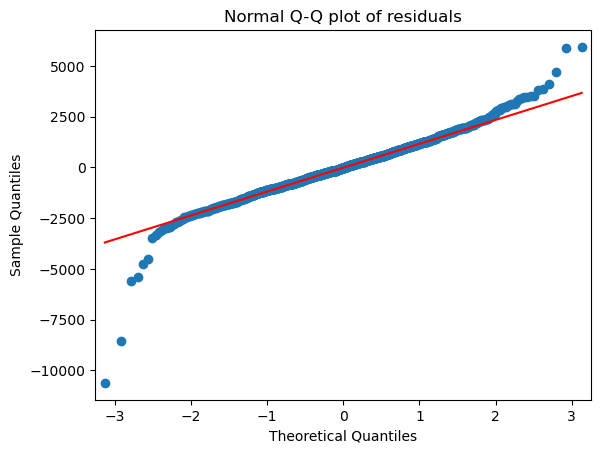

In [179]:
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling

# Generating a Q-Q plot to check if the residuals of model_2 follow a normal distribution
qqplot = sm.qqplot(model_2.resid, line='q')  # 'line' parameter is set to 'q' to draw the 45-degree diagonal line

# Setting the title of the plot
plt.title("Normal Q-Q plot of residuals")

# Displaying the plot
plt.show()


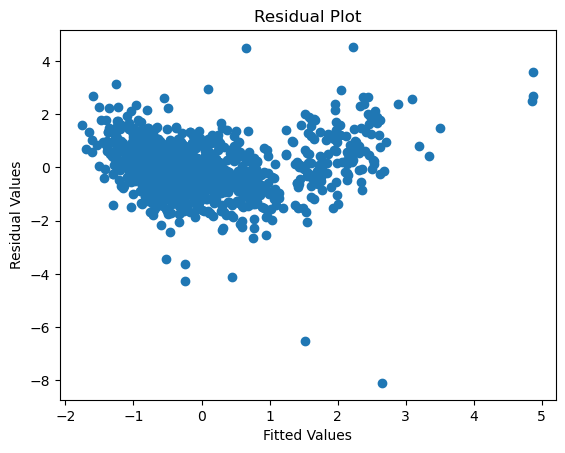

In [180]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Create a scatter plot of standardized fitted values vs. standardized residuals for model_2
plt.scatter(
    get_standardized_values(model_2.fittedvalues),  # Standardize the fitted values
    get_standardized_values(model_2.resid)          # Standardize the residual values
)

# Set the title of the plot
plt.title("Residual Plot")

# Label the x-axis as "Fitted Values"
plt.xlabel("Fitted Values")

# Label the y-axis as "Residual Values"
plt.ylabel("Residual Values")

# Display the plot
plt.show()


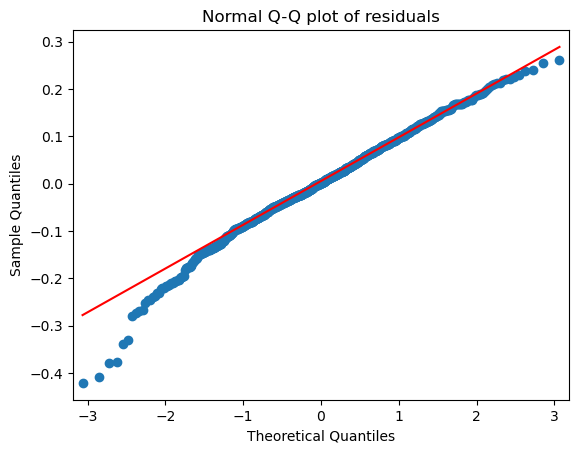

In [181]:
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Generating a Q-Q plot to check if the residuals of model_3 follow a normal distribution
qqplot = sm.qqplot(model_3.resid, line='q')  # 'line' parameter is set to 'q' to draw the 45-degree diagonal line

# Setting the title of the plot
plt.title("Normal Q-Q plot of residuals")

# Displaying the plot
plt.show()


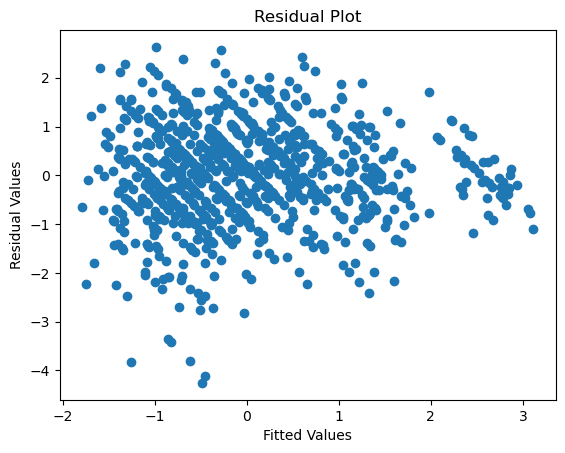

In [182]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Create a scatter plot of standardized fitted values vs. standardized residuals for model_3
plt.scatter(
    get_standardized_values(model_3.fittedvalues),  # Standardize the fitted values
    get_standardized_values(model_3.resid)          # Standardize the residual values
)

# Set the title of the plot
plt.title("Residual Plot")

# Label the x-axis as "Fitted Values"
plt.xlabel("Fitted Values")

# Label the y-axis as "Residual Values"
plt.ylabel("Residual Values")

# Display the plot
plt.show()

In [ ]:
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Generating a Q-Q plot to check if the residuals of model_4 follow a normal distribution
qqplot = sm.qqplot(model_4.resid, line='q')  # 'line' parameter is set to 'q' to draw the 45-degree diagonal line

# Setting the title of the plot
plt.title("Normal Q-Q plot of residuals")

# Displaying the plot
plt.show()


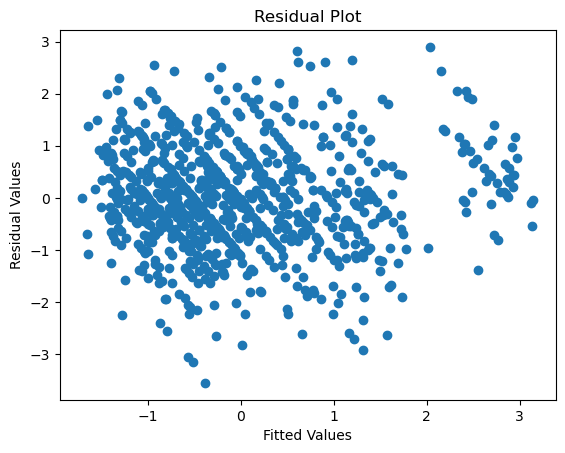

In [183]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Create a scatter plot of standardized fitted values vs. standardized residuals for model_4
plt.scatter(
    get_standardized_values(model_4.fittedvalues),  # Standardize the fitted values
    get_standardized_values(model_4.resid)          # Standardize the residual values
)

# Set the title of the plot
plt.title("Residual Plot")

# Label the x-axis as "Fitted Values"
plt.xlabel("Fitted Values")

# Label the y-axis as "Residual Values"
plt.ylabel("Residual Values")

# Display the plot
plt.show()


In [ ]:
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Generating a Q-Q plot to check if the residuals of model_5 follow a normal distribution
qqplot = sm.qqplot(model_5.resid, line='q')  # 'line' parameter is set to 'q' to draw the 45-degree diagonal line

# Setting the title of the plot
plt.title("Normal Q-Q plot of residuals")

# Displaying the plot
plt.show()


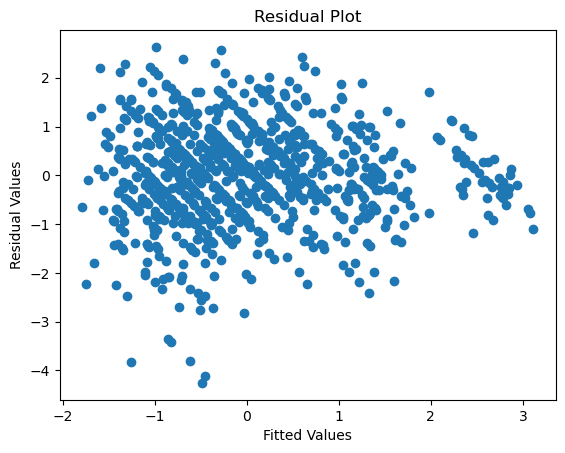

In [184]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Create a scatter plot of standardized fitted values vs. standardized residuals for model_5
plt.scatter(
    get_standardized_values(model_5.fittedvalues),  # Standardize the fitted values
    get_standardized_values(model_5.resid)          # Standardize the residual values
)

# Set the title of the plot
plt.title("Residual Plot")

# Label the x-axis as "Fitted Values"
plt.xlabel("Fitted Values")

# Label the y-axis as "Residual Values"
plt.ylabel("Residual Values")

# Display the plot
plt.show()


### Task 5:
##### Apply Lasso and Ridge methods on the model

In [205]:
from sklearn.linear_model import Ridge, Lasso             # Importing Ridge and Lasso regression classes from scikit-learn
from sklearn.preprocessing import StandardScaler          # Importing StandardScaler for feature scaling
from sklearn.metrics import mean_squared_error, r2_score  # Importing metrics for evaluating model performance


In [188]:
# Removing outlier indices from the training target variable (y_train) based on the IQR method
final_y_train = y_train.drop(index=outlier_indices_iqr)

# Displaying the shape of the final training target variable after removing outliers
final_y_train.shape

(916, 1)

#### Rigde:

In [206]:
# Import the StandardScaler class from scikit-learn to standardize features
scaler = StandardScaler()

# Fit the scaler on the training data and transform the features to have zero mean and unit variance
X_scaled = scaler.fit_transform(final_X_train_data_3)

In [207]:
# Import the Ridge class from scikit-learn for Ridge regression
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model with a regularization strength of alpha=1.0
ridge = Ridge(alpha=1.0)

# Fit the Ridge regression model on the scaled training data and target variable
ridge.fit(X_scaled, final_y_train)

# Predict the target values using the fitted Ridge regression model
ridge_predictions = ridge.predict(X_scaled)

# Print the coefficients of the Ridge regression model
print("Ridge coefficients:", ridge.coef_)

# Print the R^2 score to evaluate how well the model explains the variance in the target variable
print("Ridge R^2 score:", r2_score(final_y_train, ridge_predictions))

# Print the Mean Squared Error to assess the average squared difference between predicted and actual values
print("Ridge Mean Squared Error:", mean_squared_error(final_y_train, ridge_predictions))

Ridge coefficients: [[-1.00202775e+01 -2.08429793e+00 -6.03620015e-01  3.52807954e+00
   0.00000000e+00  2.25270736e+03]]
Ridge R^2 score: 0.9999933231085443
Ridge Mean Squared Error: 34.30566532503891


#### Lasso:

In [208]:
# Import the Lasso class from scikit-learn for Lasso regression
from sklearn.linear_model import Lasso

# Initialize the Lasso regression model with a regularization strength of alpha=0.1
lasso = Lasso(alpha=0.1)

# Fit the Lasso regression model on the scaled training data and target variable
lasso.fit(X_scaled, final_y_train)

# Predict the target values using the fitted Lasso regression model
lasso_predictions = lasso.predict(X_scaled)

# Print the coefficients of the Lasso regression model
print("Lasso coefficients:", lasso.coef_)

# Print the R^2 score to evaluate how well the model explains the variance in the target variable
print("Lasso R^2 score:", r2_score(final_y_train, lasso_predictions))

# Print the Mean Squared Error to assess the average squared difference between predicted and actual values
print("Lasso Mean Squared Error:", mean_squared_error(final_y_train, lasso_predictions))

Lasso coefficients: [-5.65763204e-01 -8.75358326e-02 -0.00000000e+00  1.46501007e-01
  0.00000000e+00  2.26599499e+03]
Lasso R^2 score: 0.9999999821857819
Lasso Mean Squared Error: 0.09152891095867209


In [211]:
# Fit OLS model using statsmodels
X_with_const = sm.add_constant(final_X_train_data_3)  # Add intercept term for OLS
ols_model = sm.OLS(final_y_train, X_with_const).fit()
ols_predictions = ols_model.predict(X_with_const)

ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.650e+31
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:44:29   Log-Likelihood:                 22920.
No. Observations:                 916   AIC:                        -4.583e+04
Df Residuals:                     910   BIC:                        -4.580e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04        -4.547e-13   2.85e-13     -1.596      0.111   -1.01e-12    1.05e-13
KM               -3.126e-13   1.87e-13     -1.674      0.095   -6.79e-13     5.4e-14
HP                5.684e-14   2.15e-13      0.265      0.791   -3.64e-13    4.78e-13
Weight           -2.501e-12   3.16e-13     -7.914      0.000   -3.12e-12   -1.88e-12
Fuel_Type_Petrol -2.274e-12   1.25e-12     -1.822      0.069   -4.72e-12    1.76e-13
Price                1.0000   1.15e-16    8.7e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.734
Skew:                          -0.008   Prob(JB):                        0.693
Kurtosis:                       2.862   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""